In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

from solutions_multiv import encodings_solution_1, encodings_solution_2

In this notebook, you'll be working with the Pokémon dataset from the univariate plots lesson.

In [2]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


**Task 1**: To start, let's look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

#### Make a scatter plot to show the relationship between three variables speed, defense and special-attack

- encoding with sizes: refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with `regplot`.
- if a numeric variable include negative values, then you might want to choose a color encoding instead.

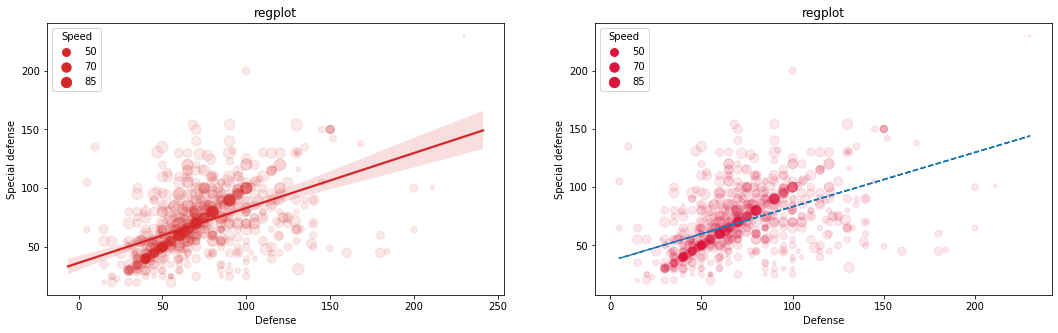

In [3]:
import numpy as np
from numpy.polynomial.polynomial import polyfit

plt.figure(figsize= [18,5])

plt.subplot(121)
base_color = sb.color_palette()[3]
sb.regplot(data = pokemon, x = 'defense', y = 'special-defense', color = base_color, x_jitter=0.2, y_jitter=0.2,
          fit_reg=True, scatter_kws={'s': pokemon['speed']/0.8, 'alpha':0.1});
plt.xlabel('Defense')
plt.ylabel('Special defense')
plt.title('regplot')

# add fig legend
sizes = [50, 70, 85]
base_color = sb.color_palette()[3]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/0.8, color = base_color))
    plt.legend(legend_obj, sizes, title = 'Speed')

# add scatter plot 
plt.subplot(122)
# Fit with polyfit
b, m = polyfit(pokemon['defense'], pokemon['special-defense'], 1)
plt.plot(pokemon['defense'], b + m * pokemon['defense'], '--');
plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', s = 'speed',c ='crimson', marker = 'o',alpha = 0.1)
plt.xlabel('Defense')
plt.ylabel('Special defense')
plt.title('regplot')

sizes = [50, 70, 85]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s = s/0.8, marker ='o', c = 'crimson'))
    plt.legend(legend_obj, sizes, title = 'Speed')

- Encoding with color (color is a very common encoding for variables, for both qualitative and quantitative variables)
- If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's
- For quantitative variables, we can set color based on numeric value in the scatter function through the "c" parameter, much like how we set up marker sizes through "s". (Unlike with size, we don't have an easy way of setting color by numeric value through `regplot` due to how its "color" argument is set up.

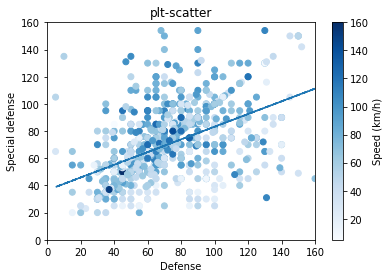

In [4]:
b, m = polyfit(pokemon['defense'], pokemon['special-defense'], 1)
plt.plot(pokemon['defense'], b + m * pokemon['defense'], '--');


plt.scatter(data = pokemon, x = 'defense', y = 'special-defense', c ='speed', alpha =1, cmap='Blues');
plt.colorbar(orientation = 'vertical', fraction =0.15, label ='Speed (km/h)')

plt.xlabel('Defense')
plt.ylabel('Special defense')
plt.title('plt-scatter')
plt.xlim(0,160)
plt.ylim(0,160);

If you have a qualitative variable, you can set different colors for different levels of a categorical variable through the "hue" parameter on seaborn's FacetGrid class.
``` python
g = sb.FacetGrid(data = df, hue = 'cat_var1', size = 5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()
```


In [ ]:
# run this cell to check your work against ours
encodings_solution_1()

To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [5]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


In [6]:
type_cols = ['type_1','type_2']
non_type_cols = pokemon.columns.difference(type_cols) # exclude the columns given as arguments

In [9]:
pokemon.shape

(807, 14)

In [10]:
pkmn_types = pokemon.melt(id_vars = non_type_cols, value_vars = type_cols, 
                          var_name = 'type_level', value_name = 'type').dropna()

In [11]:
pkmn_types.shape

(1212, 14)

In [12]:
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


**Task 2**: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon? You may want to subset your dataframe before proceeding with the plotting code. **Hint**: If you remember from the univariate plots lesson, one of your axis variables may need to be transformed. If you plan on using FacetGrid, its `.set()` method will be vital for adjusting the axis scaling and tick marks. Check the [last example in the Seaborn documentation](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) for an example of how the `.set()` method is used, and the [matplotlib documentation of the Axes class](https://matplotlib.org/api/axes_api.html) for properties that you might want to set.

In [13]:
pkmn_types.type.value_counts()

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

<h3 align="center">Make a scatter plot with Fairy type and Dragon type pokemon</h3> 

1. two numeric variables (weights vs heights)

2. two catagoric variables(fairy vs dragon)

#### we can use color and shape to present with `plt`.`scatter`
select subset of data

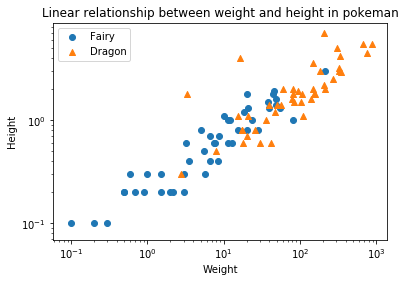

In [50]:
# assign two shape to each catagorical variable
pokmn_markers = [['fairy', 'o'],
               ['dragon', '^']]

# loop through two catagorical variables and plot
for cat, marker in pokmn_markers:
    df_cat = pkmn_types[pkmn_types['type'] == cat]
    plt.scatter(data = df_cat, x = 'weight', y = 'height', alpha = 1, marker = marker);
plt.legend(['Fairy','Dragon'])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Linear relationship between weight and height in pokeman');

In [43]:
pkmn_types.query('type == "fairy"').head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
34,45,113,48,1,0.6,70,35,60,65,clefairy,35,7.5,type_1,fairy
35,70,217,73,1,1.3,95,36,95,90,clefable,60,40.0,type_1,fairy
172,25,44,28,2,0.3,50,173,45,55,cleffa,15,3.0,type_1,fairy
174,20,49,65,2,0.3,35,175,40,65,togepi,20,1.5,type_1,fairy
175,40,142,85,2,0.6,55,176,80,105,togetic,40,3.2,type_1,fairy


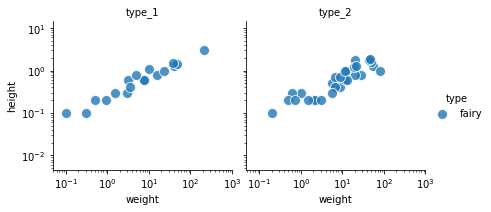

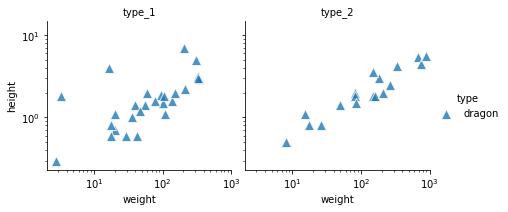

In [100]:
# assign two shape to each catagorical variable
pokmn_markers = [['fairy', 'o'],
               ['dragon', '^']]

# loop through two catagorical variables and plot
for cat, marker in pokmn_markers:
    df_cat = pkmn_types[pkmn_types['type'] == cat]
    g = sb.FacetGrid(df_cat, col = "type_level", hue = "type")
    g.map(plt.scatter, "weight", "height", edgecolor="w", alpha = 0.8, s =100, marker = marker)
    g.set(xscale = 'log', yscale = 'log')
    g.set(xlim=(0, 1000), ylim=(0, 15))
    g.set_titles("{col_name}")
    g.add_legend()

After subsetting the data, I used FacetGrid to set up and generate the plot. I used the .set() method for FacetGrid objects to set the x-scaling and tick marks. The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.


/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


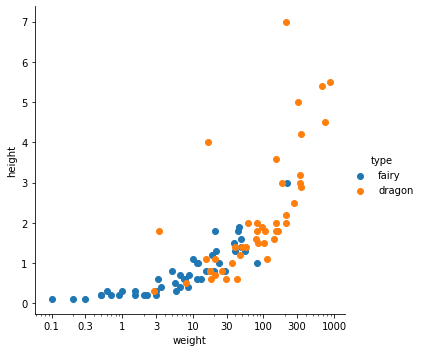

In [59]:
# run this cell to check your work against ours
encodings_solution_2()